In [1]:
import numpy as np
import nltk
from nltk import bigrams
from nltk.tokenize import SpaceTokenizer
import pandas as pd

In [2]:
# three example centences
#sents = ["I enjoy flying", "I like flying", "I enjoy NLP", "I like NLP",  "I like deep_learning", "I enjoy deep_learning"]

In [3]:
sents = ["I like banana", "I like orange", "I like apple", "I like jack_fruit",  "I like grape", "I like water_mellon"]

In [4]:
sent_list = [word for word in [sent.split() for sent in sents] ]

In [5]:
sent_list

[['I', 'like', 'banana'],
 ['I', 'like', 'orange'],
 ['I', 'like', 'apple'],
 ['I', 'like', 'jack_fruit'],
 ['I', 'like', 'grape'],
 ['I', 'like', 'water_mellon']]

In [6]:
unique_words = []
for sent in sents:
    for w in sent.split():
        if w not in unique_words: 
            unique_words.append(w)
print(unique_words)

['I', 'like', 'banana', 'orange', 'apple', 'jack_fruit', 'grape', 'water_mellon']


In [7]:
unique_words.index('like')

1

In [8]:
I = pd.Index(unique_words)
C = pd.Index(unique_words)
df = pd.DataFrame(data=np.zeros((len(unique_words), len(unique_words))), index=I, columns=C)

In [9]:
df

,I,like,banana,orange,apple,jack_fruit,grape,water_mellon
I,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
like,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
banana,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
orange,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
apple,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
jack_fruit,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
grape,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
water_mellon,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
for w in unique_words:
    for sent in sent_list:
        if w in sent:
            print(w)
            if sent.index(w) < len(sent)-1:
                df.loc[w, sent[sent.index(w)+1]] = df.loc[w, sent[sent.index(w)+1]] + 1
            if sent.index(w) > 0:
                df.loc[w, sent[sent.index(w)-1]] = df.loc[w, sent[sent.index(w)-1]] + 1

I
I
I
I
I
I
like
like
like
like
like
like
banana
orange
apple
jack_fruit
grape
water_mellon


In [11]:
df

,I,like,banana,orange,apple,jack_fruit,grape,water_mellon
I,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
like,6.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
banana,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
orange,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
apple,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
jack_fruit,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
grape,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
water_mellon,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
vecs = df.values

In [13]:
vecs

array([[0., 6., 0., 0., 0., 0., 0., 0.],
       [6., 0., 1., 1., 1., 1., 1., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.]])

In [14]:
# Source https://towardsdatascience.com/using-fasttext-and-svd-to-visualise-word-embeddings-instantly-5b8fa870c3d1
# Carrying out Singular Value Decomposition
U, s, Vh = np.linalg.svd(vecs,full_matrices=False) 

In [15]:
np.set_printoptions(linewidth=115)
print(U)
print(U.shape)

[[-9.25820100e-01  0.00000000e+00  3.77964473e-01  5.44268525e-17 -2.11498728e-33  6.77840270e-50 -8.94005929e-67
  -4.32201383e-83]
 [ 0.00000000e+00 -1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [-1.54303350e-01  0.00000000e+00 -3.77964473e-01  9.12870929e-01 -2.34520451e-16 -6.77840270e-50  8.94005929e-67
   4.32201383e-83]
 [-1.54303350e-01  0.00000000e+00 -3.77964473e-01 -1.82574186e-01  8.94427191e-01  4.01682464e-17  8.03364928e-17
  -2.38153543e-17]
 [-1.54303350e-01  0.00000000e+00 -3.77964473e-01 -1.82574186e-01 -2.23606798e-01  8.66025404e-01  6.64587050e-17
   3.42740142e-17]
 [-1.54303350e-01  0.00000000e+00 -3.77964473e-01 -1.82574186e-01 -2.23606798e-01 -2.88675135e-01  8.16496581e-01
   9.40789679e-17]
 [-1.54303350e-01  0.00000000e+00 -3.77964473e-01 -1.82574186e-01 -2.23606798e-01 -2.88675135e-01 -4.08248290e-01
  -7.07106781e-01]
 [-1.54303350e-01  0.00000000e+00 -3.77964473e-01 -1.82574186e-01 -2.

In [16]:
print(s)

[6.48074070e+000 6.48074070e+000 2.81492914e-016 6.29897451e-048 2.92153959e-080 1.59952264e-112 2.62785702e-145
 0.00000000e+000]


In [17]:
s_diag = np.diag(s)
print(s_diag)

[[6.48074070e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000]
 [0.00000000e+000 6.48074070e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 2.81492914e-016 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 6.29897451e-048 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000 2.92153959e-080 0.00000000e+000 0.00000000e+000
  0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000 1.59952264e-112 0.00000000e+000
  0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000 2.62785702e-145
  0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.0

### Reduce dimensionality by selecting the first k singular features
  * Reduce the text to 2 (k=2) dimentional word embedding

In [18]:
s_diag[:, :2]

array([[6.4807407, 0.       ],
       [0.       , 6.4807407],
       [0.       , 0.       ],
       [0.       , 0.       ],
       [0.       , 0.       ],
       [0.       , 0.       ],
       [0.       , 0.       ],
       [0.       , 0.       ]])

In [19]:
embeddings = np.dot(U, s_diag[:, :2])

In [20]:
print(embeddings)

[[-6.         0.       ]
 [ 0.        -6.4807407]
 [-1.         0.       ]
 [-1.         0.       ]
 [-1.         0.       ]
 [-1.         0.       ]
 [-1.         0.       ]
 [-1.         0.       ]]


In [21]:
print("Word Embedding for - \"enjoy\" - ", embeddings[1])
print("Word Embedding for - \"like\" - ", embeddings[3])

Word Embedding for - "enjoy" -  [ 0.        -6.4807407]
Word Embedding for - "like" -  [-1.  0.]


In [22]:
from numpy import dot
from numpy.linalg import norm

cos_sim = dot(embeddings[1].T, embeddings[3])/(norm(embeddings[1])*norm(embeddings[3]))
print(cos_sim)

0.0


In [23]:
cos_sim = dot(embeddings[4].T, embeddings[5])/(norm(embeddings[4])*norm(embeddings[5]))
print(cos_sim)

1.0


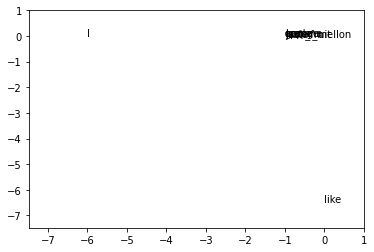

In [24]:
import matplotlib.pyplot as plt

# Plotting words and their vector representations

xmin = np.min(embeddings)
xmax = np.max(embeddings)

for i in range(len(embeddings)):
        fig = plt.gcf()
        #fig.set_size_inches(18.5, 10.5)
        plt.text(embeddings[i,0], embeddings[i,1], unique_words[i])
        plt.xlim((xmin-1,xmax+1))
        plt.ylim((xmin-1,xmax+1))
        
plt.show()